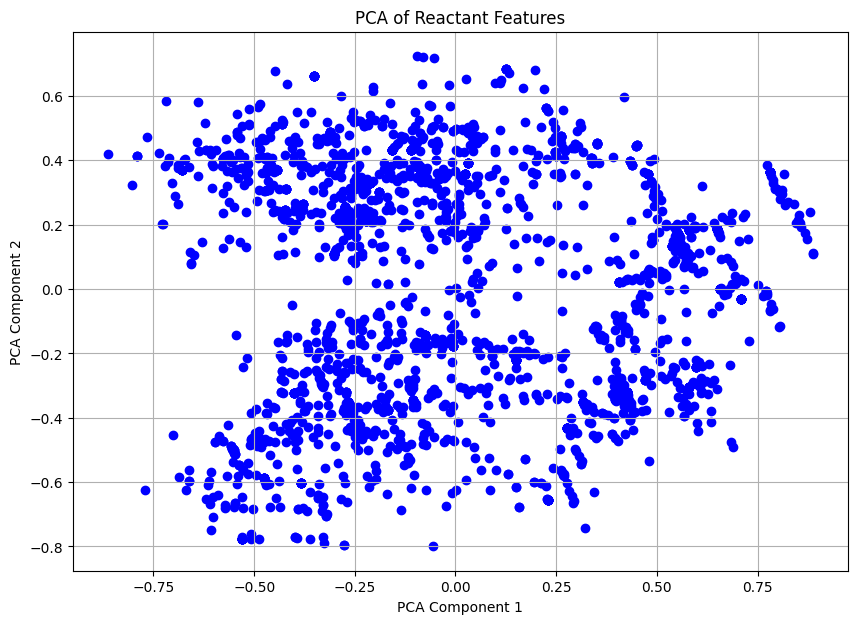

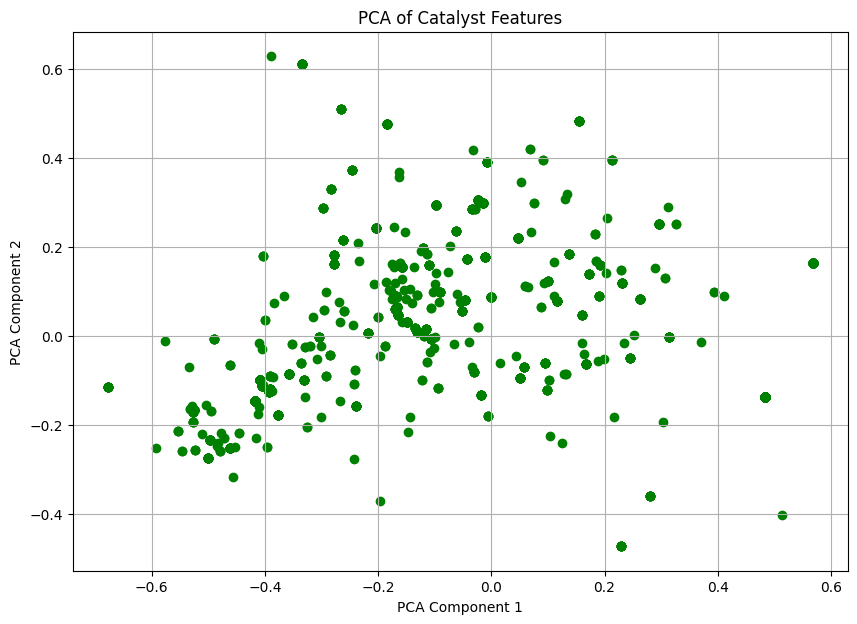

'pca_transformed_data.xlsx'

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' for labeling
labels = df['Rxn ID']

# Drop irrelevant features and non-numeric columns
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_numeric)

# Transform the data using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply PCA to Reactant Features
reactant_features = [col for col in df_selected.columns if 'Q' in col or 'C' in col]
pca_reactants = PCA(n_components=2)
reactant_pca = pca_reactants.fit_transform(df_selected[reactant_features])

# Apply PCA to Catalyst Features
catalyst_features = [col for col in df_selected.columns if 'Quadrant' in col]
pca_catalysts = PCA(n_components=2)
catalyst_pca = pca_catalysts.fit_transform(df_selected[catalyst_features])

# Convert the PCA-transformed features back to DataFrames
reactant_pca_df = pd.DataFrame(reactant_pca, columns=[f'Reactant_PCA{i+1}' for i in range(reactant_pca.shape[1])])
catalyst_pca_df = pd.DataFrame(catalyst_pca, columns=[f'Catalyst_PCA{i+1}' for i in range(catalyst_pca.shape[1])])

# Combine the PCA-transformed features into a final DataFrame
df_final_pca = pd.concat([reactant_pca_df, catalyst_pca_df], axis=1)

# Save the resulting DataFrame to a new Excel file
pca_output_path = 'pca_transformed_data.xlsx'
df_final_pca.to_excel(pca_output_path, index=False)

# Visualization of PCA for Reactant Features with labels
plt.figure(figsize=(10, 7))
plt.scatter(reactant_pca_df['Reactant_PCA1'], reactant_pca_df['Reactant_PCA2'], color='blue')

plt.title('PCA of Reactant Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Visualization of PCA for Catalyst Features with labels
plt.figure(figsize=(10, 7))
plt.scatter(catalyst_pca_df['Catalyst_PCA1'], catalyst_pca_df['Catalyst_PCA2'], color='green')

plt.title('PCA of Catalyst Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

pca_output_path


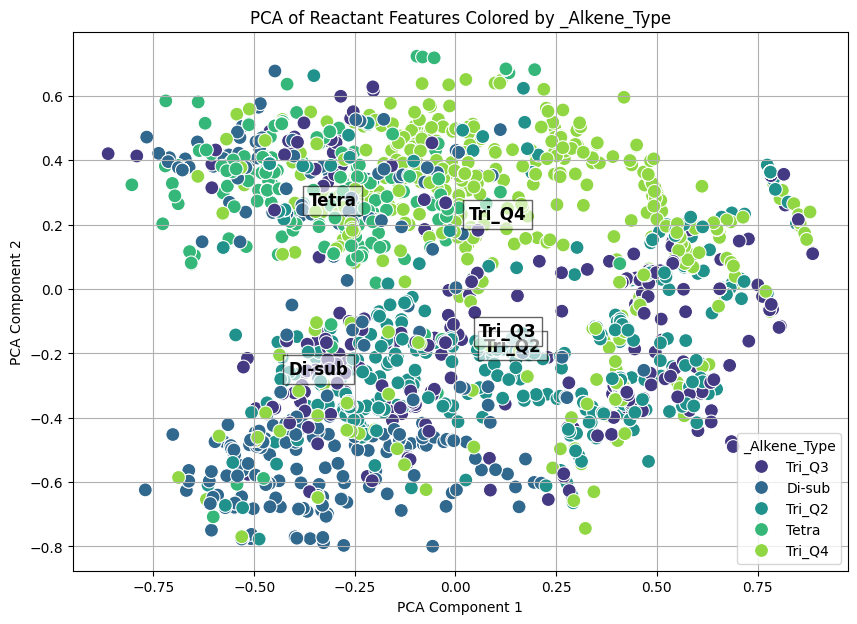

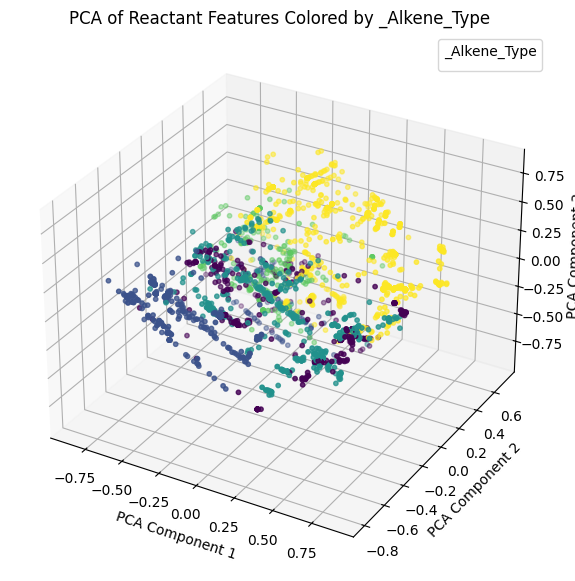

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop irrelevant features and non-numeric columns, but keep '_Alkene_Type'
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Ensure 'alkene_types' aligns with the numeric dataframe
alkene_types = alkene_types[df_numeric.index]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_numeric)

# Transform the data using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply PCA to Reactant Features
reactant_features = [col for col in df_selected.columns if 'Q' in col or 'C' in col]
pca_reactants = PCA(n_components=2)
reactant_pca = pca_reactants.fit_transform(df_selected[reactant_features])

# Convert the PCA-transformed features back to a DataFrame
reactant_pca_df = pd.DataFrame(reactant_pca, columns=[f'Reactant_PCA{i+1}' for i in range(reactant_pca.shape[1])])

# Visualization of PCA for Reactant Features colored by _Alkene_Type
# Visualization of PCA for Reactant Features colored by _Alkene_Type
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reactant_pca_df['Reactant_PCA1'], 
                y=reactant_pca_df['Reactant_PCA2'], 
                hue=alkene_types, 
                palette='viridis', 
                s=100)

# Calculate centroids for each group (_Alkene_Type)
group_centroids = reactant_pca_df.groupby(alkene_types).mean()

# Annotate each group with its name at the centroid position
for label, centroid in group_centroids.iterrows():
    plt.text(centroid['Reactant_PCA1'], centroid['Reactant_PCA2'], label, 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))

plt.title('PCA of Reactant Features Colored by _Alkene_Type')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='_Alkene_Type')
plt.grid(True)
plt.show()


import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop irrelevant features and non-numeric columns, but keep '_Alkene_Type'
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Ensure 'alkene_types' aligns with the numeric dataframe
alkene_types = alkene_types[df_numeric.index]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_numeric)

# Transform the data using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply PCA to Reactant Features with 3 components
reactant_features = [col for col in df_selected.columns if 'Q' in col or 'C' in col]
pca_reactants = PCA(n_components=3)
reactant_pca = pca_reactants.fit_transform(df_selected[reactant_features])

# Convert the PCA-transformed features back to a DataFrame
reactant_pca_df = pd.DataFrame(reactant_pca, columns=[f'Reactant_PCA{i+1}' for i in range(reactant_pca.shape[1])])

# Visualization of PCA for Reactant Features colored by _Alkene_Type in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reactant_pca_df['Reactant_PCA1'], 
                reactant_pca_df['Reactant_PCA2'], 
                reactant_pca_df['Reactant_PCA3'], 
                c=alkene_types.map({label: idx for idx, label in enumerate(alkene_types.unique())}), 
                cmap='viridis', s=10)

ax.set_title('PCA of Reactant Features Colored by _Alkene_Type')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Adding legend manually
# Mapping unique alkene types to the colors
unique_alkene_types = alkene_types.unique()
handles, _ = sc.legend_elements(prop="colors", alpha=0.6)
legend_labels = [unique_alkene_types[int(h.get_label())] for h in handles if h.get_label().isdigit()]
ax.legend(handles, legend_labels, title="_Alkene_Type")

plt.show()


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID', 'Reactant ID', and '_Alkene_Type' for labeling
labels = df['Rxn ID']
reactant_ids = df['Reactant ID']
alkene_types = df['_Alkene_Type']

# Filter to include only Tri_Q3, Tri_Q4, and Tri_Q2 groups
tri_q_filter = df['_Alkene_Type'].isin(['Tri_Q3', 'Tri_Q4', 'Tri_Q2'])
df = df[tri_q_filter]
labels = labels[tri_q_filter]
reactant_ids = reactant_ids[tri_q_filter]
alkene_types = alkene_types[tri_q_filter]

# Check if the dataframe is empty after filtering
if df.empty:
    print("No data available in the 'Tri_Q3', 'Tri_Q4', and 'Tri_Q2' groups.")
else:
    # Drop irrelevant features and non-numeric columns, but keep '_Alkene_Type'
    df = df.drop(columns=['Rxn ID', 'Reactant ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG'])

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[float, int])

    # Drop rows with any missing values
    df_numeric = df_numeric.dropna()

    # Ensure 'alkene_types' and 'labels' align with the numeric dataframe
    alkene_types = alkene_types[df_numeric.index]
    labels = labels[df_numeric.index]
    reactant_ids = reactant_ids[df_numeric.index]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the data
    scaler.fit(df_numeric)

    # Transform the data using the fitted scaler
    df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

    # Apply VarianceThreshold to remove low-variance features
    selector = VarianceThreshold(threshold=0)
    df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

    # Apply PCA to Reactant Features with 3 components
    reactant_features = [col for col in df_selected.columns if 'Q' in col or 'C' in col]
   
    pca_reactants = PCA(n_components=3)
    reactant_pca = pca_reactants.fit_transform(df_selected[reactant_features])

    # Convert the PCA-transformed features back to a DataFrame
    reactant_pca_df = pd.DataFrame(reactant_pca, columns=[f'Reactant_PCA{i+1}' for i in range(reactant_pca.shape[1])])

    # Coordinates to backtrack
    coordinates = [
        [-0.5633, 0.4978, -1.0345],
        [-0.4504, 0.8348, -0.9445],
        [0.7276, -0.4504, 0.2268],
        [1.0146, 0.0812, 0.00734],
        [0.1126, 0.7797, -1.0345],
        [-0.4506, 0.8348, -0.5394]
    ]

    # Calculate distances and find closest molecules
    distances = np.linalg.norm(reactant_pca_df.values[:, np.newaxis] - coordinates, axis=2)
    closest_indices = np.argmin(distances, axis=0)

    # Retrieve the corresponding Reaction IDs, Reactant IDs, and Alkene Types
    closest_molecules = labels.iloc[closest_indices]
    closest_reactants = reactant_ids.iloc[closest_indices]
    closest_alkene_types = alkene_types.iloc[closest_indices]

    # Print the results
    results = pd.DataFrame({
        'Reaction ID': closest_molecules,
        'Reactant ID': closest_reactants,
        'Alkene Type': closest_alkene_types
    })

    print(results)


      Reaction ID Reactant ID Alkene Type
147          2494  react_2027      Tri_Q4
1063        11759   react_638      Tri_Q4
1464        12229  react_1742      Tri_Q2
1329        12001  react_2051      Tri_Q3
1909        10869   react_474      Tri_Q4
1063        11759   react_638      Tri_Q4


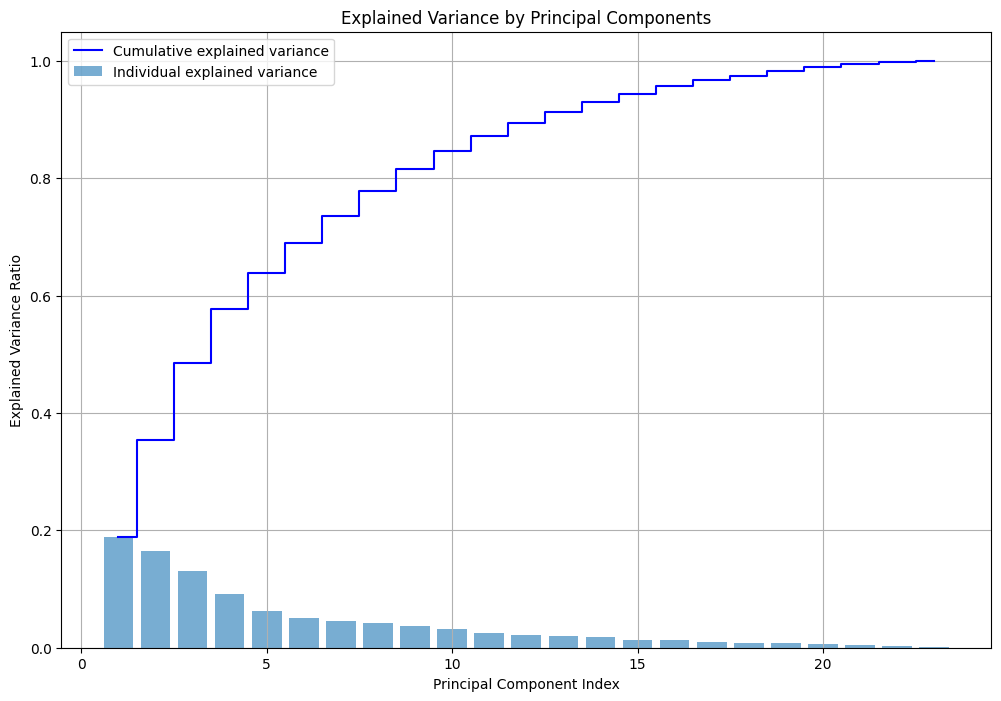

In [24]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Rxn ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop irrelevant features
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply PCA
pca = PCA()
pca.fit(df_selected)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance by principal component
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance', align='center')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance', color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


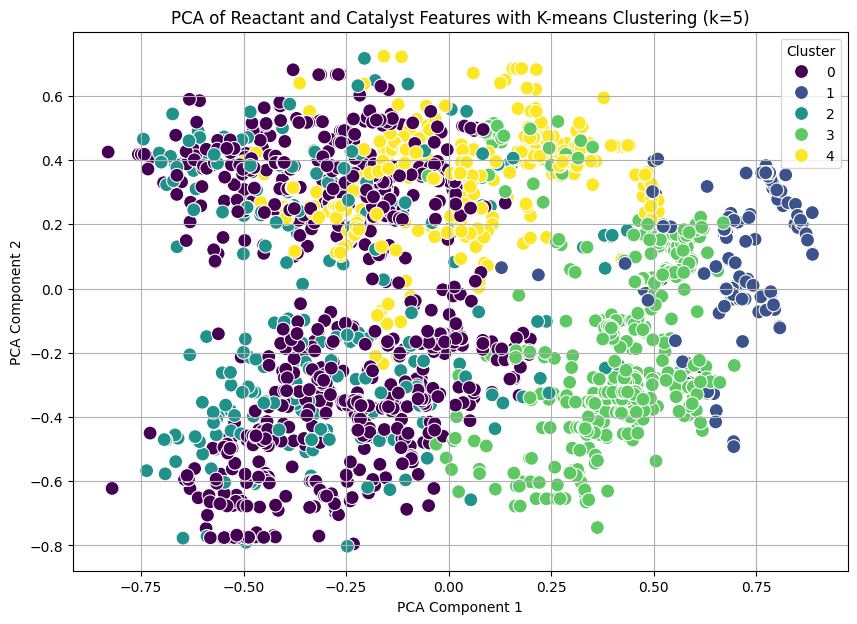

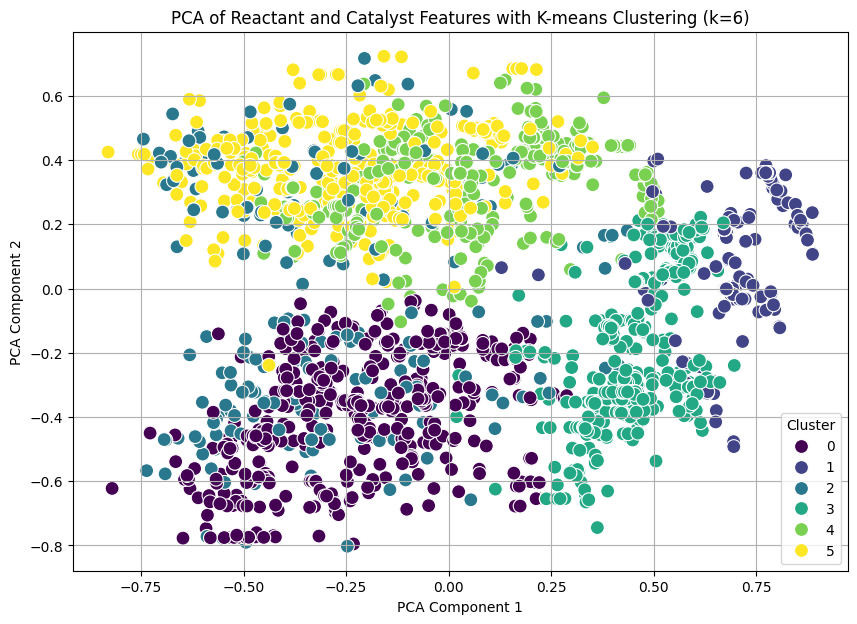

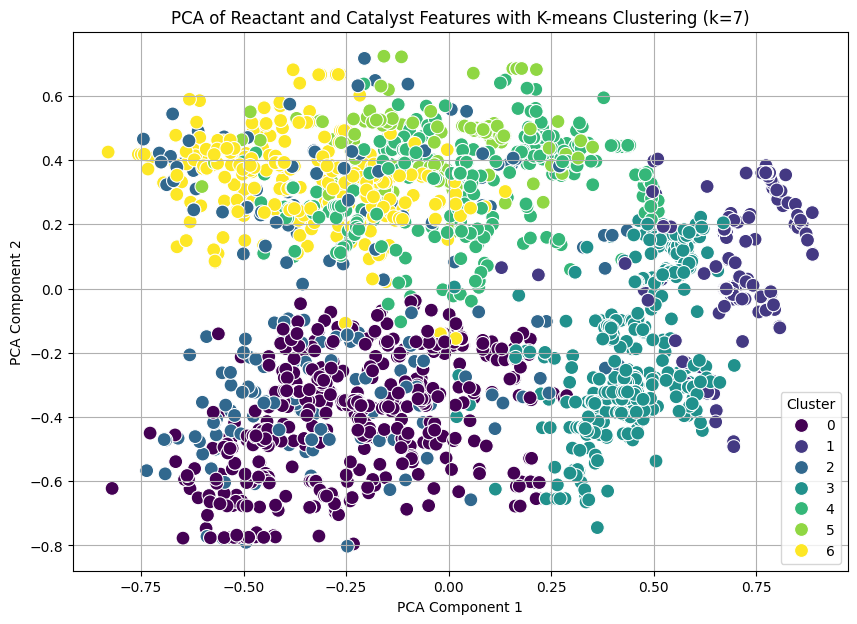

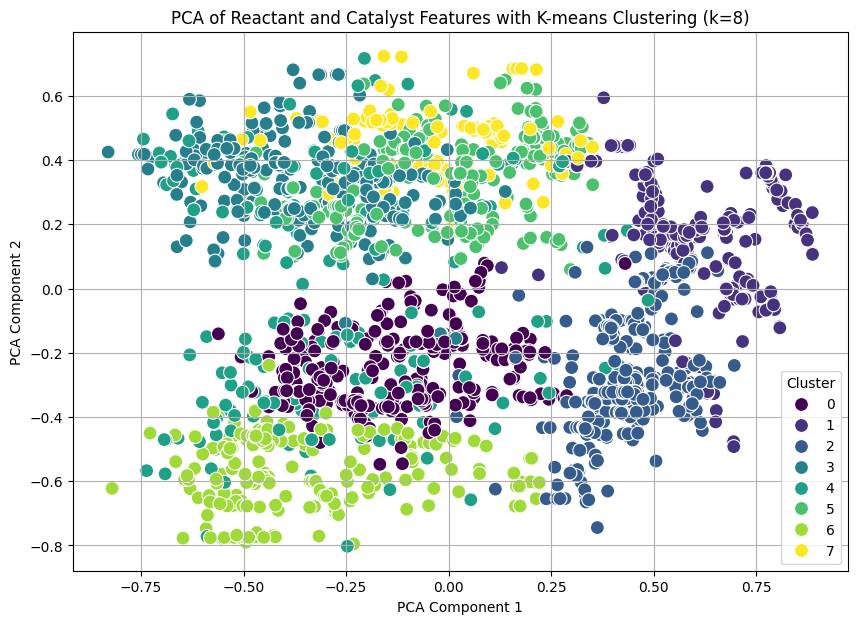

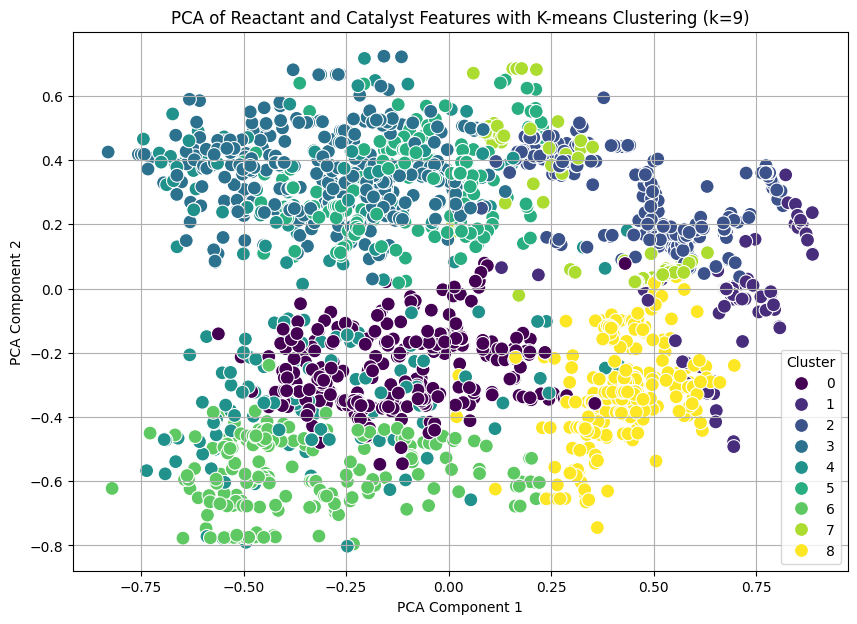

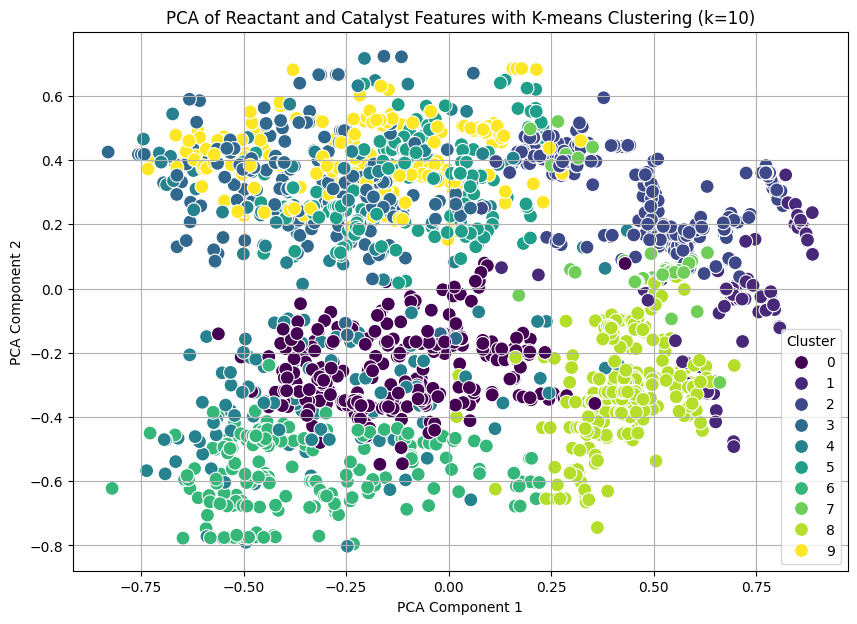

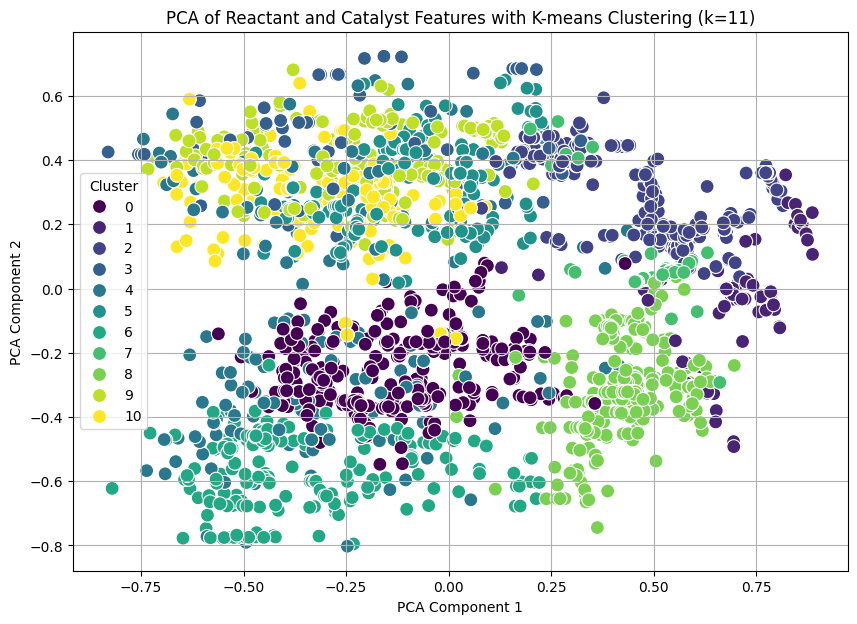

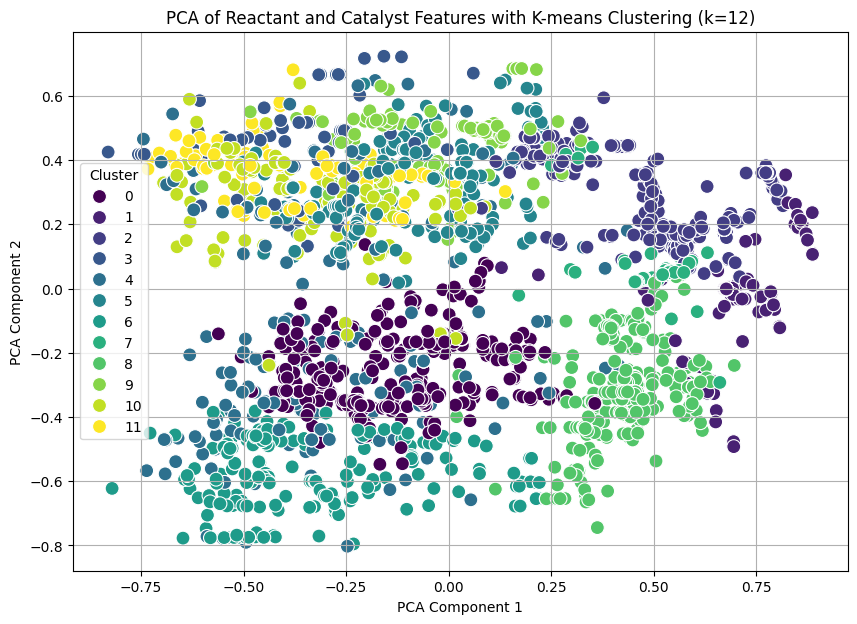

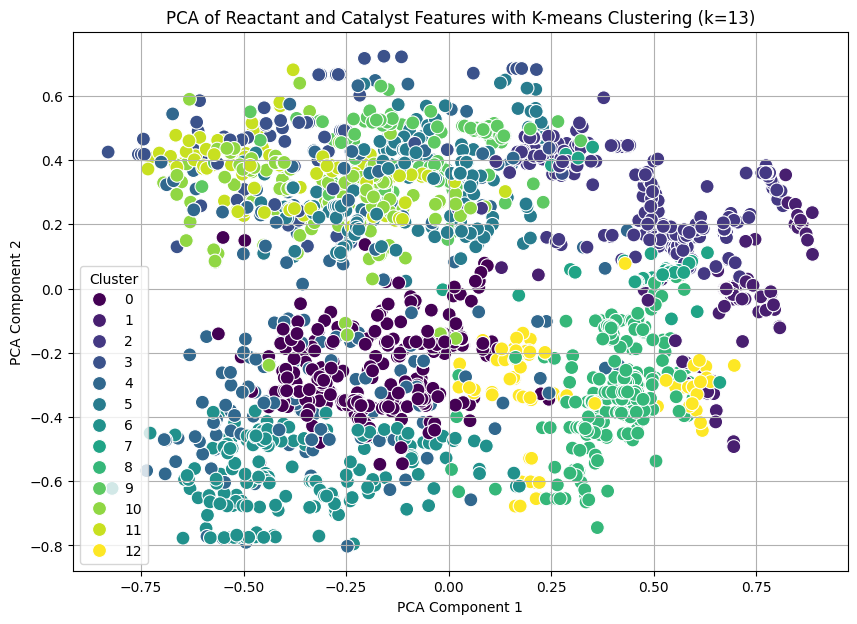

In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop the irrelevant features
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Loop through a range of cluster numbers for K-means clustering and PCA visualization
for n_clusters in range(5, 14):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_selected)
    
    # Apply PCA to the selected features for visualization
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(df_selected)
    
    # Create a DataFrame with the PCA results and cluster labels
    pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = cluster_labels
    
    # Plot the PCA results with clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100, legend='full')
    
    plt.title(f'PCA of Reactant and Catalyst Features with K-means Clustering (k={n_clusters})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


0
2
1
3
2
4
